In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

from vega_datasets import data


In [3]:
date = pd.Timestamp(month=3, day=12, year=2020)
date

Timestamp('2020-03-12 00:00:00')

In [6]:
date = datetime(month=2, day=12, year=2020)
date

datetime.datetime(2020, 2, 12, 0, 0)

### use datetime module

In [7]:
datetime.now()

datetime.datetime(2023, 7, 26, 10, 39, 28, 412031)

In [8]:
today = datetime.now()
today

datetime.datetime(2023, 7, 26, 10, 40, 2, 790088)

### subtract two dates

In [9]:
date - today

datetime.timedelta(days=-1261, seconds=47997, microseconds=209912)

### timedelta

In [10]:
today + pd.Timedelta(days=10) # add 10 days from today

datetime.datetime(2023, 8, 5, 10, 40, 2, 790088)

### one date

In [11]:
date = 'Jan 1 1970' # string

In [13]:
date = pd.to_datetime(date) # converts string to date
date

Timestamp('1970-01-01 00:00:00')

### one date, but confuse pandas

In [15]:
date = 'Jan:7:1970' #werid date format in string

In [ ]:
pd.to_datetime(date)  # errors out due to weird above format

In [17]:
date = pd.to_datetime(date, format='%b:%d:%Y') #todl pandas format of the date, so no error

### use strftime to reformat date to more readable version "string format time"

In [18]:
date

Timestamp('1970-01-07 00:00:00')

In [19]:
date.strftime('%m/%d/%y') # changes format of string to inputted format

'01/07/70'

### Doing a column of dates using column of coffee consumed per day

In [20]:
url = "https://gist.githubusercontent.com/ryanorsinger/\
b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)

In [22]:
df.head()


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [23]:
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [26]:
df.date = df.date.astype('datetime64')

In [28]:
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

### Extract pieces of a date

#### use .dt to extract



the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html


In [29]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [30]:
df.date.dt.day_of_week #day of the week

0      1
1      2
2      3
3      4
4      0
      ..
256    2
257    3
258    4
259    0
260    1
Name: date, Length: 261, dtype: int64

In [31]:
df.date.dt.day # day of the month

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

### add them back to initial df

In [34]:
df['year'] = df.date.dt.year # creat column of just year
df['day'] = df.date.dt.day # day of month
df['day_of_week'] = df.date.dt.day_of_week # day of week
df.head()

,date,coffee_consumption,year,day,day_of_week
0,2019-01-01,14.301915,2019,1,1
1,2019-01-02,12.905900,2019,2,2
2,2019-01-03,10.046015,2019,3,3
3,2019-01-04,6.354805,2019,4,4
4,2019-01-07,8.545563,2019,7,0


### reformat using strftime()

In [36]:
df.date.dt.strftime('%m/%d/ --- %y')

0      01/01/ --- 19
1      01/02/ --- 19
2      01/03/ --- 19
3      01/04/ --- 19
4      01/07/ --- 19
           ...      
256    12/25/ --- 19
257    12/26/ --- 19
258    12/27/ --- 19
259    12/30/ --- 19
260    12/31/ --- 19
Name: date, Length: 261, dtype: object

## Exercises 1


 1   import the datetime module from the datetime library
 2   convert the date column to a datetime
 3   subtract one day from each date
 4   reformat the dates as "Sun - March 26, 2022"


1. import the datetime module from the datetime library

Done at top of notebook

In [50]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')

2.   convert the date column to a datetime

In [51]:
df.tail()

,date
95,Jan - 04 - 2022
96,Mar - 24 - 2022
97,Aug - 28 - 2022
98,Jan - 31 - 2022
99,May - 16 - 2022


In [53]:
df.dtypes

date    object
dtype: object

In [55]:
df.date = df.date.astype('datetime64')
df.date

0    2022-03-27
1    2022-05-22
2    2022-05-16
3    2022-08-22
4    2022-03-15
        ...    
95   2022-01-04
96   2022-03-24
97   2022-08-28
98   2022-01-31
99   2022-05-16
Name: date, Length: 100, dtype: datetime64[ns]

3. 

In [ ]:
df.date 

## More complexity

In [59]:
#save url
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

#read in df
df = pd.read_csv(csv_export_url)
df

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [60]:
df.info

<bound method DataFrame.info of                    Date  Symbol   Close       Volume
0      2020-03-13 12-PM  ETHUSD  128.71   3906590.52
1      2020-03-13 12-AM  ETHUSD  129.94  10329663.70
2      2020-03-13 11-AM  ETHUSD  119.51   3311080.29
3      2020-03-13 10-AM  ETHUSD  124.47   3483436.48
4      2020-03-13 09-AM  ETHUSD  124.08   2767584.44
...                 ...     ...     ...          ...
23669  2017-07-01 05-PM  ETHUSD  272.57   1894983.33
23670  2017-07-01 04-PM  ETHUSD  265.74   1287300.75
23671  2017-07-01 03-PM  ETHUSD  268.79   1500282.55
23672  2017-07-01 02-PM  ETHUSD  274.83   1702536.85
23673  2017-07-01 01-PM  ETHUSD  275.01   3010787.99

[23674 rows x 4 columns]>

In [62]:
df.columns = df.columns.str.lower()

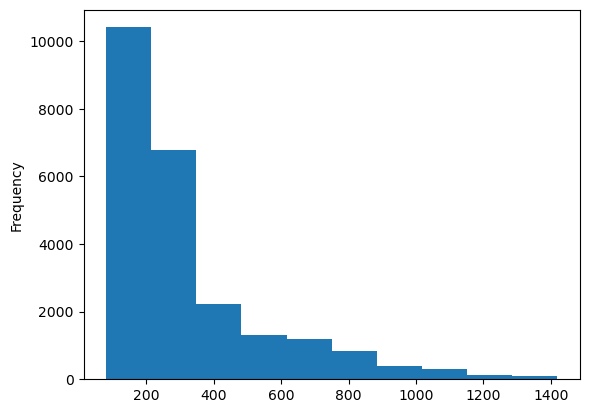

In [66]:
df.close.plot.hist(); # colon gets rid of clustter at tome of graph

<Axes: >

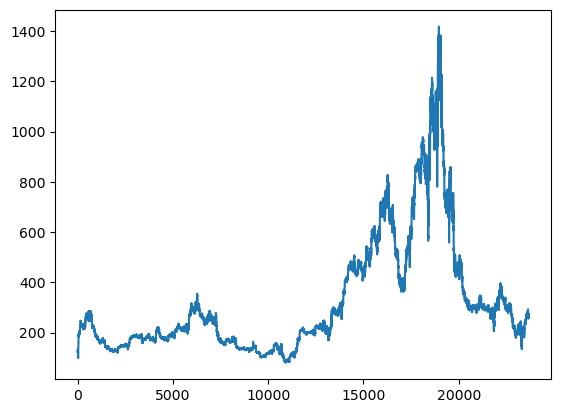

In [67]:
df.close.plot()

## How do we make Pandas aware of time series?


 1   Convert 'date' column to datetime object
  2  Set the datetime column as index
  3  Sort the datetime index


#### Convert date column to datetime object

In [68]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [70]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p') #inputs format of original to put it into datetime format

In [71]:
df = df.set_index('date') # sets date as index

In [72]:
df.head()

,symbol,close,volume
date,,,
2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


In [73]:
df = df.sort_index() # puts index in date time order

<Axes: xlabel='date'>

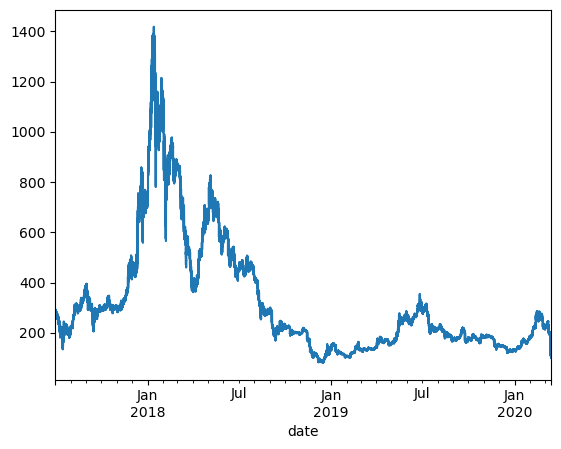

In [74]:
df.close.plot() # now plot gives actual time values over time

### let's find mean close value on each day of the week

Note: when datetime is an index, we do not use .dt to use datetime methods/attributes

In [76]:
#pull out weekday name & save when date is index
df['weekday'] = df.index.day_name()

In [77]:
df.head()

,symbol,close,volume,weekday
date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [79]:
df.groupby('weekday').mean().close #gives mean close value by day of th week

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/3616154404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('weekday').mean().close


weekday
Friday       321.134596
Monday       326.186823
Saturday     327.707441
Sunday       326.316418
Thursday     323.334524
Tuesday      325.189722
Wednesday    324.622361
Name: close, dtype: float64

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/1262616511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('weekday').mean().close.plot()


<Axes: xlabel='weekday'>

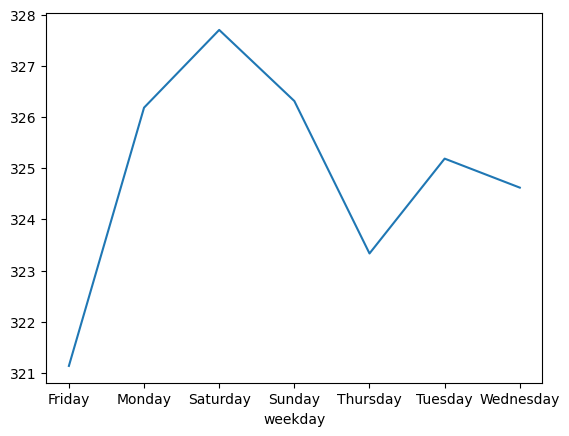

In [80]:
df.groupby('weekday').mean().close.plot()

In [81]:
#putting days in correct order
df['dayofweek'] = df.index.dayofweek

In [82]:
df.head()


,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5


/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/895745323.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('weekday').mean().sort_values('dayofweek').close.plot()


<Axes: xlabel='weekday'>

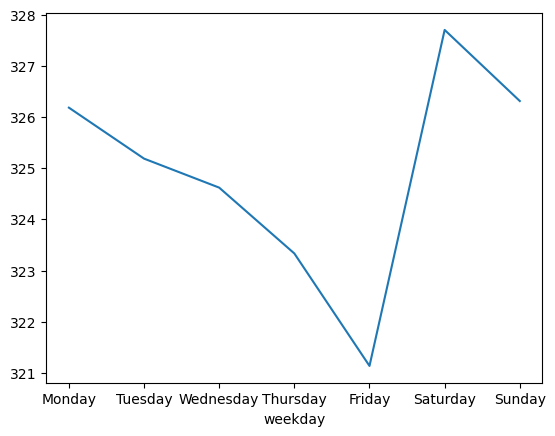

In [85]:
df.groupby('weekday').mean().sort_values('dayofweek').close.plot() # puts days of the week in order

### How do we subset the dataframe?

.loc vs .iloc

loc is by name
iloc is by position

In [86]:
df.loc['2017-07-02'] #gives everything by given date, can put in : between 2 dates for a date range

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-02 00:00:00,ETHUSD,286.00,1323285.21,Sunday,6
2017-07-02 01:00:00,ETHUSD,259.90,956362.19,Sunday,6
2017-07-02 02:00:00,ETHUSD,257.02,1335138.27,Sunday,6
2017-07-02 03:00:00,ETHUSD,257.84,596059.44,Sunday,6
2017-07-02 04:00:00,ETHUSD,260.88,771738.33,Sunday,6
2017-07-02 05:00:00,ETHUSD,274.00,1746145.00,Sunday,6
2017-07-02 06:00:00,ETHUSD,263.37,590248.89,Sunday,6
2017-07-02 07:00:00,ETHUSD,265.89,983053.30,Sunday,6
2017-07-02 08:00:00,ETHUSD,263.53,2863655.38,Sunday,6


### Different period of data

#### Downsampling: reduce number of rows (less granular), use asfreq

In [87]:
df.asfreq('D') # puts frequency to D for Day

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday,6
2017-07-03 11:00:00,ETHUSD,279.50,1218731.52,Monday,0
2017-07-04 11:00:00,ETHUSD,269.57,391696.83,Tuesday,1
2017-07-05 11:00:00,ETHUSD,265.20,1110376.59,Wednesday,2
...,...,...,...,...,...
2020-03-09 11:00:00,ETHUSD,198.34,3145976.84,Monday,0
2020-03-10 11:00:00,ETHUSD,203.12,1871438.76,Tuesday,1
2020-03-11 11:00:00,ETHUSD,193.37,664974.80,Wednesday,2


In [88]:
df.asfreq('M') # monthly frequency 

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-31 11:00:00,ETHUSD,199.96,1058461.41,Monday,0
2017-08-31 11:00:00,ETHUSD,388.19,1189036.71,Thursday,3
2017-09-30 11:00:00,ETHUSD,300.37,1002416.23,Saturday,5
2017-10-31 11:00:00,ETHUSD,303.45,1014184.66,Tuesday,1
2017-11-30 11:00:00,ETHUSD,420.42,3367153.22,Thursday,3
2017-12-31 11:00:00,ETHUSD,750.11,1380263.49,Sunday,6
2018-01-31 11:00:00,ETHUSD,1090.00,3979122.71,Wednesday,2
2018-02-28 11:00:00,ETHUSD,869.62,1252993.15,Wednesday,2
2018-03-31 11:00:00,ETHUSD,394.53,1226088.77,Saturday,5


### Upsampling: increasing rows, more granularity

In [89]:
df.asfreq('30T') # every 30 minutes, produces nulls

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5.0
2017-07-01 11:30:00,NaN,NaN,NaN,NaN,NaN
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5.0
2017-07-01 12:30:00,NaN,NaN,NaN,NaN,NaN
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5.0
...,...,...,...,...,...
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4.0
2020-03-13 18:30:00,NaN,NaN,NaN,NaN,NaN
2020-03-13 19:00:00,ETHUSD,134.03,7579741.09,Friday,4.0


In [90]:
#forward filling nulls, next value
df.asfreq('30T', method='ffill')

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 11:30:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 12:30:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
...,...,...,...,...,...
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4
2020-03-13 18:30:00,ETHUSD,128.93,4898735.81,Friday,4
2020-03-13 19:00:00,ETHUSD,134.03,7579741.09,Friday,4


In [92]:
#back filling nulls last value
df.asfreq('30T', method='bfill')

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 11:30:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 12:30:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
...,...,...,...,...,...
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4
2020-03-13 18:30:00,ETHUSD,134.03,7579741.09,Friday,4
2020-03-13 19:00:00,ETHUSD,134.03,7579741.09,Friday,4


### Resampling - aggregate over time

In [93]:
# fills nulls with dailt mean
df.resample('D').mean() 

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/941734378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('D').mean()


,close,volume,dayofweek
date,,,
2017-07-01,265.284615,2.198771e+06,5.0
2017-07-02,269.782500,2.177595e+06,6.0
2017-07-03,278.882083,1.459015e+06,0.0
2017-07-04,276.743333,1.254579e+06,1.0
2017-07-05,265.025833,1.797923e+06,2.0
...,...,...,...
2020-03-09,200.818333,3.804752e+06,0.0
2020-03-10,201.577500,1.553063e+06,1.0
2020-03-11,195.910417,1.894868e+06,2.0


### Rolling averages: smooths out short term fluctuations in time data highlighting long term trends

uses rolling()

In [94]:
df.rolling(5).mean() #gives 5 days of rolling average, gives nulls for chunks that are not 5 days long

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/3183812969.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['symbol', 'weekday'], dtype='object')
  df.rolling(5).mean() #gives 5 days of rolling average


,close,volume,dayofweek
date,,,
2017-07-01 11:00:00,NaN,NaN,NaN
2017-07-01 12:00:00,NaN,NaN,NaN
2017-07-01 13:00:00,NaN,NaN,NaN
2017-07-01 14:00:00,NaN,NaN,NaN
2017-07-01 15:00:00,267.776,1543465.826,5.0
...,...,...,...
2020-03-13 16:00:00,120.588,5812728.210,4.0
2020-03-13 17:00:00,121.606,5582100.290,4.0
2020-03-13 18:00:00,127.616,4645300.866,4.0


/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/3982715195.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('W').mean().rolling(4).mean().close.plot(label='4weeks')
/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_7698/3982715195.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('W').mean().rolling(12).mean().close.plot(label='12weeks')


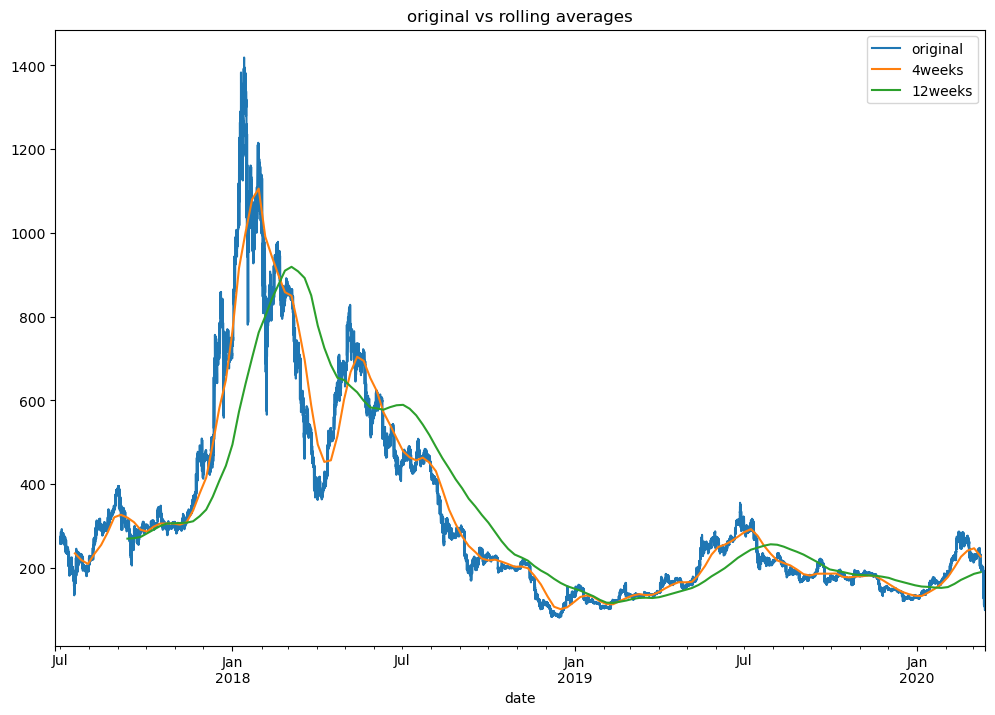

In [96]:
plt.figure(figsize=(12,8))

#original granularity
df.close.plot(label='original')

#resample by week and look at 4 weeks rolling
df.resample('W').mean().rolling(4).mean().close.plot(label='4weeks')

#resample by week and look at 12 weeks rolling
df.resample('W').mean().rolling(12).mean().close.plot(label='12weeks')

plt.legend()
plt.title('original vs rolling averages')
plt.show()

Lagging or leading data

use .shift: move data backwards and forwards
use .diff: find the difference with the previous observation (or a specified further back observation)

In [98]:
df.shift(1).head() # can shift with negative value to shift back

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,None,NaN,NaN,None,NaN
2017-07-01 12:00:00,ETHUSD,257.13,679358.87,Saturday,5.0
2017-07-01 13:00:00,ETHUSD,263.12,824362.87,Saturday,5.0
2017-07-01 14:00:00,ETHUSD,275.01,3010787.99,Saturday,5.0
2017-07-01 15:00:00,ETHUSD,274.83,1702536.85,Saturday,5.0


In [99]:
df.close.diff(1) #shows difference between previous and current value

date
2017-07-01 11:00:00      NaN
2017-07-01 12:00:00     5.99
2017-07-01 13:00:00    11.89
2017-07-01 14:00:00    -0.18
2017-07-01 15:00:00    -6.04
                       ...  
2020-03-13 16:00:00    10.70
2020-03-13 17:00:00     6.23
2020-03-13 18:00:00    -4.87
2020-03-13 19:00:00     5.10
2020-03-13 20:00:00    -9.18
Name: close, Length: 23674, dtype: float64

### Recap



    use datetime.datetime module
    to cast as a date
        .astype('datetime64')
        pd.to_datetime()
            can use format argument for funky dates
    strftime notation
        https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    attritubes and methods
        https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
    to make pandas time aware
        Convert 'date' column to datetime object
        Set the datetime column as index
        Sort the datetime index
    sampling methods
        downsampling/ upsampling
            .asfreq()
            fill nulls
                .ffill/.bfill
        resampling
            .resample()
        rolling average
            .rolling()

